In [1]:


import scipy.stats
import os
import csv
from scipy.special import erf, erfinv
import numpy as np
%matplotlib nbagg
import matplotlib.pyplot as plt

UPPER_BOUND = 1200

# observed gaps between trains, in seconds
# collected using code in redline_data.py, run daily 4-6pm
# for 5 days, Monday 6 May 2013 to Friday 10 May 2013

OBSERVED_GAP_TIMES = np.array([
    428.0, 705.0, 407.0, 465.0, 433.0, 425.0, 204.0, 506.0, 143.0, 351.0, 
    450.0, 598.0, 464.0, 749.0, 341.0, 586.0, 754.0, 256.0, 378.0, 435.0, 
    176.0, 405.0, 360.0, 519.0, 648.0, 374.0, 483.0, 537.0, 578.0, 534.0, 
    577.0, 619.0, 538.0, 331.0, 186.0, 629.0, 193.0, 360.0, 660.0, 484.0, 
    512.0, 315.0, 457.0, 404.0, 740.0, 388.0, 357.0, 485.0, 567.0, 160.0, 
    428.0, 387.0, 901.0, 187.0, 622.0, 616.0, 585.0, 474.0, 442.0, 499.0, 
    437.0, 620.0, 351.0, 286.0, 373.0, 232.0, 393.0, 745.0, 636.0, 758.0,
])

<IPython.core.display.Javascript object>


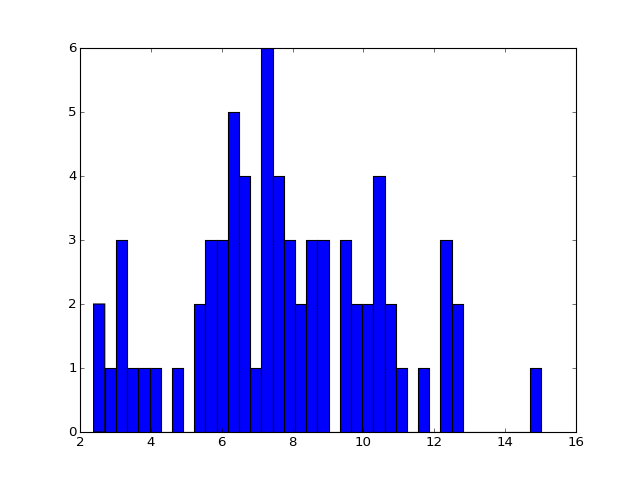

<IPython.core.display.Javascript object>


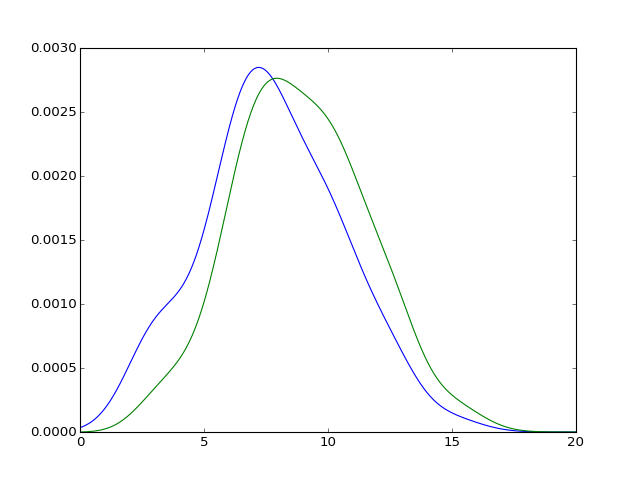

In [2]:
plt.figure()
plt.hist(OBSERVED_GAP_TIMES/60,bins=40)

N=1001
x=np.linspace(0,UPPER_BOUND/60,N)
prior = scipy.stats.gaussian_kde(OBSERVED_GAP_TIMES/60).evaluate(x)

prior=prior/prior.sum()

priorb=prior*x
priorb=priorb/priorb.sum()


zb=priorb
plt.figure()
plt.plot(x,prior)
plt.plot(x,priorb)

In [3]:
wt=zb*0

for i in range(len(wt)):
    wt[i]=(zb[x>x[i]]*(1/x[x>x[i]])).sum()

wt=wt/wt.sum()

et=wt.copy()
    

<IPython.core.display.Javascript object>


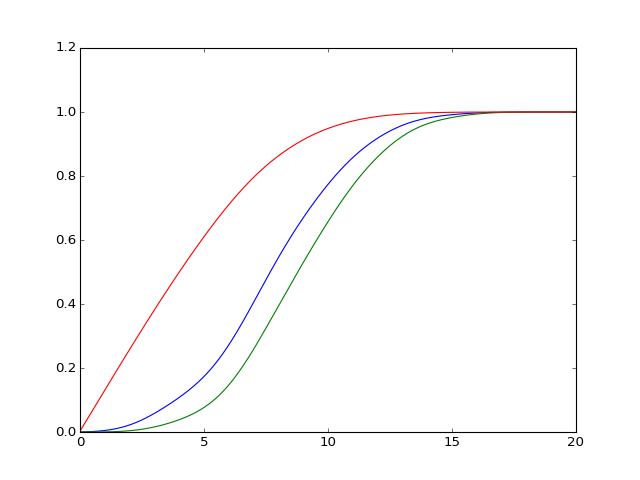

In [4]:
plt.figure()
plt.plot(x,np.cumsum(prior))
plt.plot(x,np.cumsum(priorb))
plt.plot(x,np.cumsum(wt))

<IPython.core.display.Javascript object>


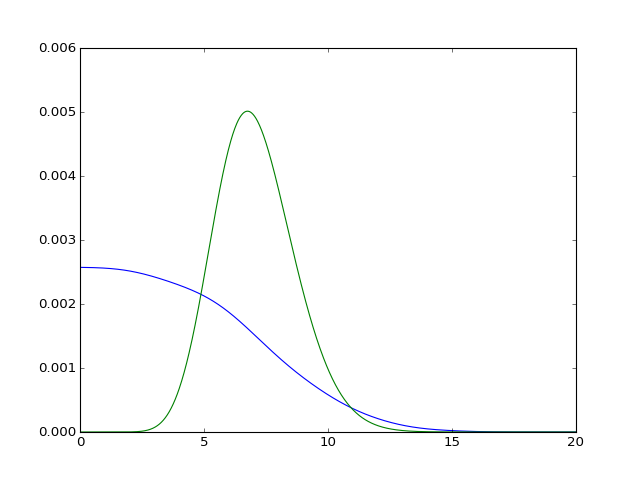

In [5]:
lam=2
numpas=15
etpost=et*0

for i in range(len(etpost)):
    etpost[i]=et[i]*(scipy.stats.poisson.pmf(numpas,lam*x[i]))
etpost[0]=0
etpost=etpost/etpost.sum()


plt.figure()
plt.plot(x,et)
plt.plot(x,etpost)


<IPython.core.display.Javascript object>


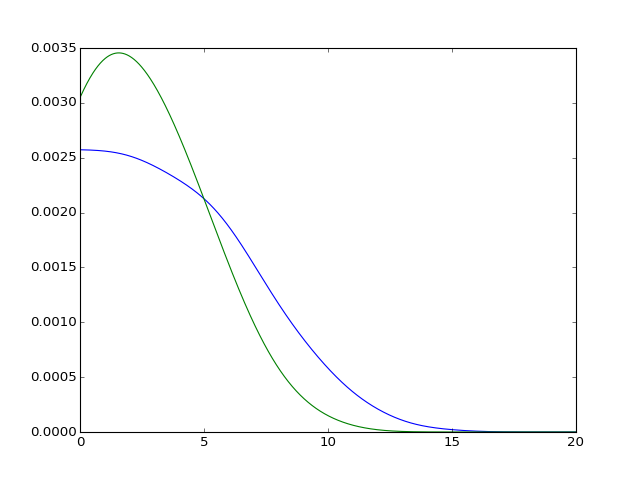

In [6]:

#wt=zb-wt

wtpost=et*0

for i in range(len(zb)):
    for j in range(len(etpost)): 
        if x[i]<=x[j]:
            continue
        diff=x[i]-x[j]
        ind=np.argmin(np.abs(x-diff))
        wtpost[ind]+=zb[i]*etpost[j]
wtpost=wtpost/wtpost.sum()

plt.figure()
plt.plot(x,wt)
plt.plot(x,wtpost)    

<IPython.core.display.Javascript object>


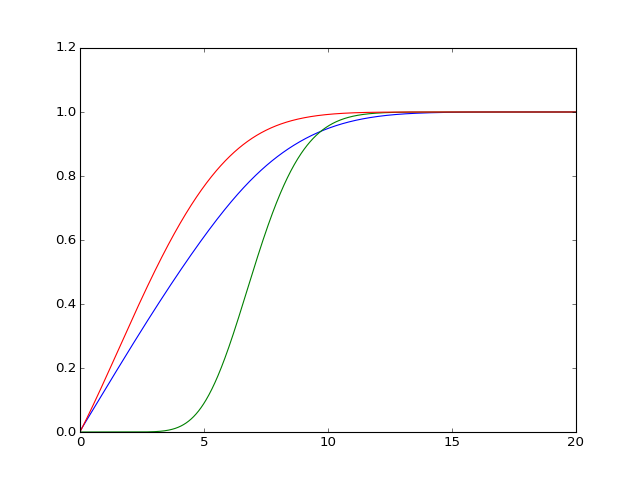

0.767607113005


In [7]:
plt.figure()
plt.plot(x,np.cumsum(et))
plt.plot(x,np.cumsum(etpost))
plt.plot(x,np.cumsum(wtpost))

print wtpost[x<=5].sum()

<IPython.core.display.Javascript object>


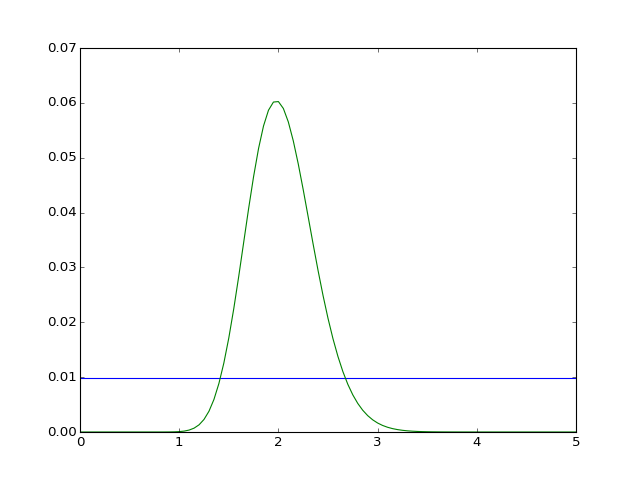

<IPython.core.display.Javascript object>


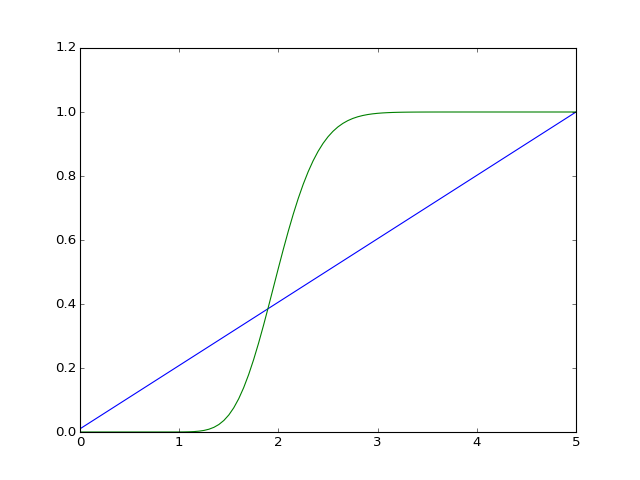

In [8]:
waittimes=np.array([4.6,1.,1.4,5.4,5.8])
numberofpeople=np.array([9,0,4,12,11])

xl=np.linspace(0,5,101)
lprior=xl*0+1
lprior=lprior/lprior.sum()

lposterior=lprior.copy()

for time,number in zip(waittimes,numberofpeople):
    for i in range(len(lprior)):
        lposterior[i]=lposterior[i]*scipy.stats.poisson.pmf(number,time*xl[i])

lposterior[0]=0
lposterior=lposterior/lposterior.sum()
        
plt.figure()
plt.plot(xl,lprior)
plt.plot(xl,lposterior)

plt.figure()
plt.plot(xl,np.cumsum(lprior))
plt.plot(xl,np.cumsum(lposterior))


<IPython.core.display.Javascript object>


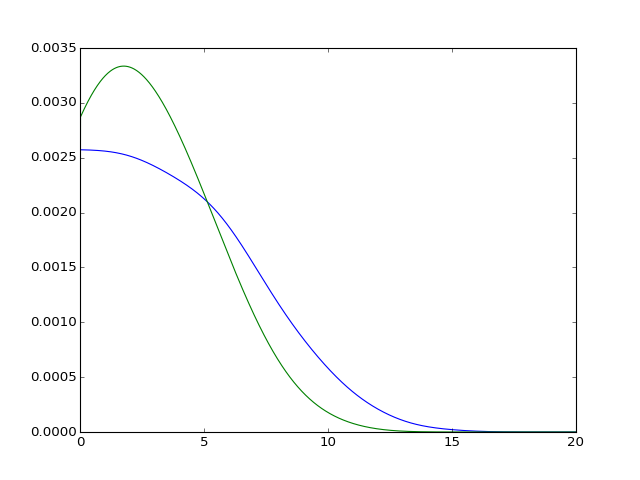

<IPython.core.display.Javascript object>


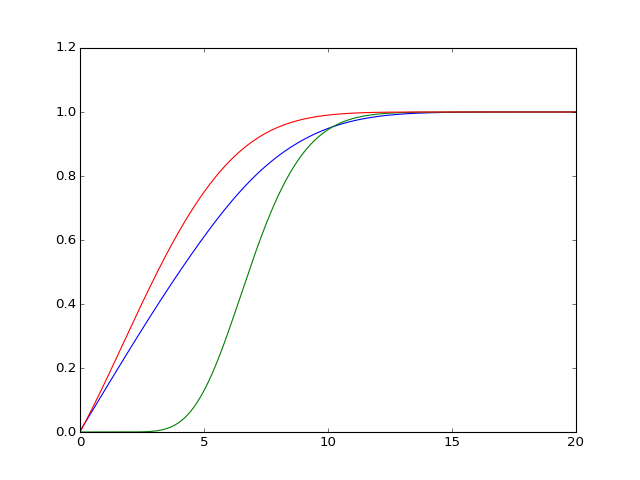

0.749758680966


In [9]:
lam=2
numpas=15
etpost=et*0

for i in range(len(etpost)):
    etpost[i]=et[i]*((scipy.stats.poisson.pmf(numpas,xl[1:]*x[i])*lposterior[1:]).sum())
etpost[0]=0
etpost=etpost/etpost.sum()

wtpost=et*0

for i in range(len(zb)):
    for j in range(len(etpost)): 
        if x[i]<=x[j]:
            continue
        diff=x[i]-x[j]
        ind=np.argmin(np.abs(x-diff))
        wtpost[ind]+=zb[i]*etpost[j]
        
wtpost=wtpost/wtpost.sum()

plt.figure()
plt.plot(x,wt)
plt.plot(x,wtpost)    

plt.figure()
plt.plot(x,np.cumsum(et))
plt.plot(x,np.cumsum(etpost))
plt.plot(x,np.cumsum(wtpost))

print wtpost[x<=5].sum()

In [10]:




#gaps220=np.array([OBSERVED_GAP_TIMES[i] for i in np.random.randint(0,OBSERVED_GAP_TIMES.shape[0]-1,220)])

#gaps220=np.concatenate([gaps220])#,[1800.,2400.,3000.]])

numpasangers=range(0,35,5)

results=[]

for numpas in numpasangers:

    priorbcum=np.cumsum(priorb)

    gaps220=np.array([x[priorbcum>=i][0] for i in np.random.random(220)])

    gaps220=np.concatenate([gaps220,[30.,40.,50.]])


    N=1001
    xlong=np.linspace(1,60,N)
    priorlongb = scipy.stats.gaussian_kde(gaps220).evaluate(xlong)
    priorlongb=priorlongb/priorlongb.sum()
    priorlong=priorlongb/xlong
    priorlong[0]=0
    priorlong=priorlong/priorlong.sum()

    #plt.figure()
    #plt.plot(xlong,priorlong)
    #plt.plot(xlong,priorlongb)

    zb=priorlongb

    wt=zb*0

    for i in range(len(wt)):
        wt[i]=(zb[xlong>xlong[i]]*(1/xlong[xlong>xlong[i]])).sum()

    wt=wt/wt.sum()

    et=wt.copy()

    etpost=et*0

    for i in range(len(etpost)):
        etpost[i]=et[i]*((scipy.stats.poisson.pmf(numpas,xl[1:]*xlong[i])*lposterior[1:]).sum())
    etpost[0]=0
    etpost=etpost/etpost.sum()

    wtpost=et*0

    for i in range(len(zb)):
        for j in range(len(etpost)): 
            if xlong[i]<=xlong[j]:
                continue
            diff=xlong[i]-xlong[j]
            ind=np.argmin(np.abs(xlong-diff))
            wtpost[ind]+=zb[i]*etpost[j]

    wtpost=wtpost/wtpost.sum()

    results.append(wtpost[xlong>=15].sum())
    print numpas

0
5
10
15
20
25
30


<IPython.core.display.Javascript object>


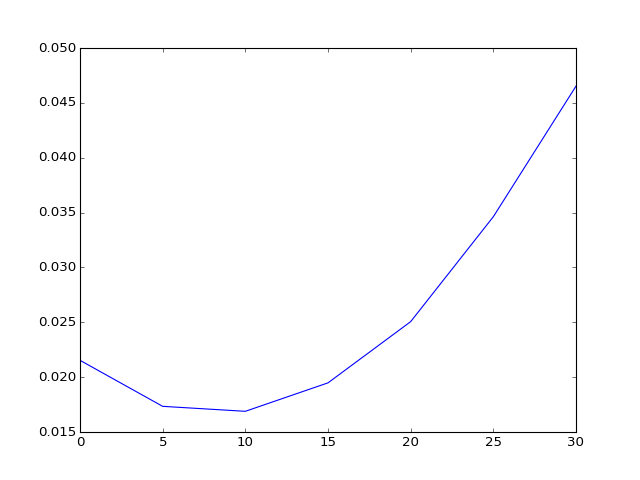

In [11]:
plt.figure()
plt.plot(numpasangers,results)

<IPython.core.display.Javascript object>


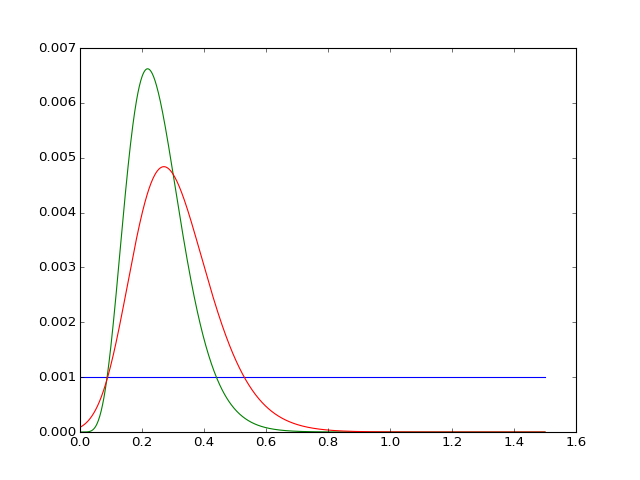

1.5
2.0
3.0
4.0
5.0
12.0
1.5
2.0
3.0
4.0
5.0
12.0


In [12]:
N=1001
xlam=np.linspace(0.001,1.5,N)

prior=np.ones(xlam.shape)
prior=prior/prior.sum()

plt.figure()
plt.plot(xlam,prior)
locations=np.array([1.5, 2, 3, 4, 5, 12])

posterior=prior.copy()
for loc in locations:
    print loc
    for i in range(len(xlam)):
        posterior[i]=posterior[i]*scipy.stats.expon.pdf(loc,scale=1/xlam[i])

posterior=posterior/posterior.sum() 
plt.plot(xlam,posterior)


#Considering the ranges
def TruncExponential(x,lam):
    x1=1
    x2=20
    
    scale=[-1/lam*np.exp(-x2*lam)-(-1/lam*np.exp(-x1*lam))]
    
    
    return np.exp(-x*lam)/scale


posterior=prior.copy()
for loc in locations:
    print loc
    for i in range(len(xlam)):
        posterior[i]=posterior[i]*TruncExponential(loc,xlam[i])

posterior=posterior/posterior.sum() 
plt.plot(xlam,posterior)
